In [1]:
import numpy as np

In [2]:
vocabulary = np.load('./tokens/vocab.npy')

In [3]:
print('Vocabulary size:', len(vocabulary))
print('Vocabulary:', vocabulary[:10])
print('type:', type(vocabulary))

Vocabulary size: 1000
Vocabulary: ['' '[UNK]' 'obesidad' 'enfermedad' 'asma' 'hipotiroidismo'
 'asma_no_especificada' 'dislipidemia' 'hipertensión_arterial'
 'falla_respiratoria']
type: <class 'numpy.ndarray'>


In [4]:
X_train = np.load('./tokens/X_train.npy')

In [5]:
print("X_train shape:", X_train.shape)
print("ten first elements of X_train:", X_train[:10])
print("type:", type(X_train))

X_train shape: (306, 730)
ten first elements of X_train: [[173   2  63 ...   0   0   0]
 [ 19  79  15 ...   0   0   0]
 [ 86   3 122 ...   0   0   0]
 ...
 [850 850 444 ...   0   0   0]
 [134  59   1 ...   0   0   0]
 [882 201 882 ...   0   0   0]]
type: <class 'numpy.ndarray'>


In [37]:
#print(X_train[0])
X_seq = []
patient_n = 0
for i in range(len(X_train[patient_n])):
    number = X_train[patient_n][i]
    print('number:', number)
    enf = vocabulary[number]
    X_seq.append(enf)
print(X_seq)
print('len(X_seq):', len(X_seq))

number: 173
number: 2
number: 63
number: 39
number: 19
number: 173
number: 2
number: 8
number: 173
number: 173
number: 173
number: 173
number: 173
number: 63
number: 180
number: 39
number: 19
number: 173
number: 158
number: 1
number: 1
number: 173
number: 173
number: 173
number: 173
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number: 0
number

In [7]:
# Paso 1: Importar las librerías necesarias
import tensorflow as tf

2025-05-12 04:46:26.526492: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 04:46:26.545200: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 04:46:26.656911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-12 04:46:26.656992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-12 04:46:26.657224: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [8]:
# Paso 3: Cargar el modelo .h5 (ajusta la ruta si es necesario)
# Por ejemplo: '/content/drive/MyDrive/modelo.h5'
ruta_modelo = './lstm_v66.h5'
modelo = tf.keras.models.load_model(ruta_modelo)

In [9]:
# Paso 4: Mostrar resumen del modelo (incluye nombre, forma y parámetros de cada capa)
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 730, 200)          200000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               135680    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344001 (1.31 MB)
Trainable params: 344001 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Paso 5 (opcional): Listar solo los nombres de las capas
for capa in modelo.layers:
    print("Nombre de la capa:", capa.name)

Nombre de la capa: embedding_1
Nombre de la capa: bidirectional_1
Nombre de la capa: dense_2
Nombre de la capa: dense_3


In [14]:
print("X_sample shape:", X_train.shape)
print(type(X_train))

X_sample shape: (306, 730)
<class 'numpy.ndarray'>


In [15]:
print("X_sample shape:", X_train[0].shape)
print(X_train[0])

X_sample shape: (730,)
[173   2  63  39  19 173   2   8 173 173 173 173 173  63 180  39  19 173
 158   1   1 173 173 173 173   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0

In [25]:
X_sample = X_train[:1, :]
print("X_sample shape:", X_sample.shape)
print(type(X_sample))

X_sample shape: (1, 730)
<class 'numpy.ndarray'>


In [17]:
print(X_sample)

[[173   2  63  39  19 173   2   8 173 173 173 173 173  63 180  39  19 173
  158   1   1 173 173 173 173   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [20]:
# 4. Seleccionar la capa desde la cual calcular el gradiente (embedding)
embedding_layer = modelo.get_layer('embedding_1')

In [23]:
from alibi.explainers import IntegratedGradients
# 5. Inicializar IntegratedGradients con el modelo y capa de entrada
ig = IntegratedGradients(modelo, layer=embedding_layer, n_steps=50, method='gausslegendre', internal_batch_size=1)

In [26]:
# 6. Ejecutar IG
explanation = ig.explain(
    X_sample,    
    target=0,    
)

In [27]:
# 7. Visualizar las atribuciones
attributions = explanation.attributions[0]  # (100, embedding_dim)
token_importances = np.sum(attributions, axis=-1)  # suma por embedding

In [28]:
print(attributions.shape)
print(type(attributions))

(1, 730, 200)
<class 'numpy.ndarray'>


In [29]:
print(token_importances.shape)
print(type(token_importances))

(1, 730)
<class 'numpy.ndarray'>


In [30]:
print(token_importances)

[[-2.7197960e-04  2.8169891e-04 -2.4945795e-04 -1.2346098e-04
  -1.3320518e-03 -2.4491994e-04  1.4848250e-05 -2.6535863e-04
  -1.1888752e-04 -8.6544474e-05 -6.3666695e-05 -4.5768153e-05
  -3.3095163e-05  2.5539948e-06 -1.7826402e-05 -8.4506964e-06
  -4.5487057e-05 -1.3294023e-05  5.7525176e-06 -3.4323131e-07
  -6.6608641e-07 -4.7576946e-06 -3.6097617e-06 -2.6026828e-06
  -1.9729810e-06  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.000

In [42]:
y_pos = np.arange(len(token_importances))
print(len(y_pos))

1


In [46]:
# Asegurarse de que token_importances es un array 1D
token_imp = np.array(token_importances).flatten()
print(token_imp.shape)
print(len(token_imp))


(730,)
730


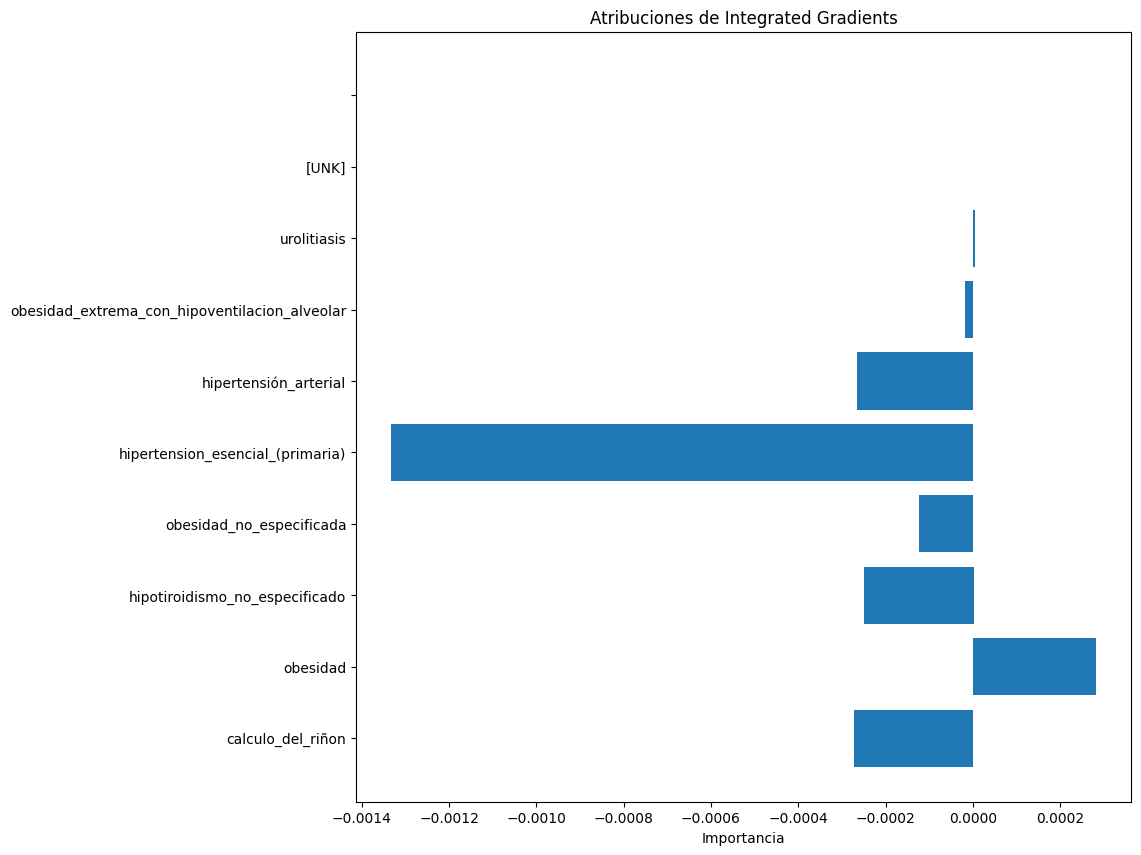

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(X_seq, token_imp)
ax.set_xlabel('Importancia')
ax.set_title('Atribuciones de Integrated Gradients')
plt.show()

In [51]:
print(X_seq)

['calculo_del_riñon', 'obesidad', 'hipotiroidismo_no_especificado', 'obesidad_no_especificada', 'hipertension_esencial_(primaria)', 'calculo_del_riñon', 'obesidad', 'hipertensión_arterial', 'calculo_del_riñon', 'calculo_del_riñon', 'calculo_del_riñon', 'calculo_del_riñon', 'calculo_del_riñon', 'hipotiroidismo_no_especificado', 'obesidad_extrema_con_hipoventilacion_alveolar', 'obesidad_no_especificada', 'hipertension_esencial_(primaria)', 'calculo_del_riñon', 'urolitiasis', '[UNK]', '[UNK]', 'calculo_del_riñon', 'calculo_del_riñon', 'calculo_del_riñon', 'calculo_del_riñon', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

In [52]:
phe_uniques = set(X_seq)
print(phe_uniques)
print(len(phe_uniques))

{'urolitiasis', '[UNK]', 'hipertensión_arterial', '', 'obesidad_extrema_con_hipoventilacion_alveolar', 'calculo_del_riñon', 'obesidad_no_especificada', 'hipertension_esencial_(primaria)', 'obesidad', 'hipotiroidismo_no_especificado'}
10
